## 1 Problem 1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_style("darkgrid")
%matplotlib inline

In [67]:
df=pd.read_csv("https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv")

#### 1.1

In [68]:
##column with anomaly is population column
df.select_dtypes(['object'])

,Population
0,3141
1,5561
2,291826
3,17013
4,997
...,...
3140,43806
3141,21294
3142,21118
3143,8533


In [69]:
##finding the <bound method Series.mean in the data

df[pd.to_numeric(df['Population'], errors='coerce').isna()]['Population']


14      <bound method Series.mean of 0         3141.0\...
22      <bound method Series.mean of 0         3141.0\...
25      <bound method Series.mean of 0         3141.0\...
30      <bound method Series.mean of 0         3141.0\...
2415    <bound method Series.mean of 0         3141.0\...
Name: Population, dtype: object

In [70]:
##converting the column to integer and filling it with zero
df['Population']=pd.to_numeric(df['Population'],errors='coerce')
df['Population'].fillna(0,inplace=True)

#### 1.2

In [6]:
##spliting fips
df['fips']=df['fips'].astype(str)
##some fips have 4 digits since state code is missing a zero at beginning
df['fips']

0        2013
1        2016
2        2020
3        2050
4        2060
        ...  
3140    56037
3141    56039
3142    56041
3143    56043
3144    56045
Name: fips, Length: 3145, dtype: object

In [7]:
##splitting to county and state
df['county']=df['fips'].str[-3:]
df['state']=df['fips'].str[:-3]


#### 1.3

In [8]:
##eduaction categorical feature
df['Education']=df.iloc[:,2:6].idxmax(axis=1)
df['Education']

0       Percent of adults with a high school diploma o...
1       Percent of adults with a high school diploma o...
2       Percent of adults completing some college or a...
3       Percent of adults with a high school diploma o...
4       Percent of adults completing some college or a...
                              ...                        
3140    Percent of adults completing some college or a...
3141    Percent of adults with a bachelor's degree or ...
3142    Percent of adults with a high school diploma o...
3143    Percent of adults completing some college or a...
3144    Percent of adults completing some college or a...
Name: Education, Length: 3145, dtype: object

In [9]:
##Religion categorical feature

df['Religion']=df.iloc[:,8:25].idxmax(axis=1)
df['Religion']

0              Other Misc
1                Catholic
2       Christian Generic
3                Catholic
4                Catholic
              ...        
3140             Catholic
3141             Catholic
3142               Mormon
3143    Christian Generic
3144    Christian Generic
Name: Religion, Length: 3145, dtype: object

In [10]:
##age groups
df['Young']=df[['0-4_rate', '5-9_rate', '10-14_rate', '15-19_rate']].sum(axis=1)
df['Adult']=df[[ '20-24_rate', '25-29_rate', '30-34_rate', '35-39_rate', '40-44_rate', '45-49_rate',
       '50-54_rate', '55-59_rate', '60-64_rate']].sum(axis=1)
df['Old']=df[['65-69_rate', '70-74_rate',
       '75-79_rate', '80-84_rate', '85+_rate']].sum(axis=1)

In [11]:
##creating ethnic categories
df['EthnicMale']=df[['WHITE_MALE_rate', 'BLACK_MALE_rate', 'NATIVE_AMERICAN_MALE_rate', 'ASIAN_MALE_rate',
       'HAWAIIAN_PACIFIC_MALE_rate', 'MULTI_MALE_rate']].idxmax(axis=1)
df['EthnicFemale']=df[[ 'WHITE_FEMALE_rate', 
       'BLACK_FEMALE_rate',  'NATIVE_AMERICAN_FEMALE_rate', 'ASIAN_FEMALE_rate',
        'HAWAIIAN_PACIFIC_FEMALE_rate','MULTI_FEMALE_rate']].idxmax(axis=1)

In [12]:
##Remove the following features
df=df.drop(columns=['PovertyUnder18Pct2014', 'Deep_Pov_Children', 'Housing units', 'Area in square miles - Water area','Area in square miles - Land area',
'Density per square mile of land area - Housing units', 'age_total_pop'])

#### 1.4

In [13]:
df.rename(columns={'Density per square mile of land area - Population': 'PopDensity', 
                   'Percent of adults with less than a high school diploma, 2011-2015': 'adultsLessHighSchool',
                   'Percent of adults with a high school diploma only, 2011-2015':'adultsWithHighSchool', 
                   'Percent of adults completing some college or associate\'s degree, 2011-2015':'adultsWithCollege',
                    'Percent of adults with a bachelor\'s degree or higher, 2011-2015':'adultsWithBachelorDegree',
                    'Unemployment_rate_2015':'unemploymentRate2015',
                    'POP_ESTIMATE_2015':'POP ESTIMATE 2015',
                   'Area in square miles - Total area':'totalArea', 
                   },inplace=True)
df.columns

Index(['fips', 'votes', 'adultsLessHighSchool', 'adultsWithHighSchool',
       'adultsWithCollege', 'adultsWithBachelorDegree', 'unemploymentRate2015',
       'POP ESTIMATE 2015', 'Amish', 'Buddhist', 'Catholic',
       'Christian Generic', 'Eastern Orthodox', 'Hindu', 'Jewish',
       'Mainline Christian', 'Mormon', 'Muslim', 'Non-Catholic Christian',
       'Other', 'Other Christian', 'Other Misc', 'Pentecostal / Charismatic',
       'Protestant Denomination', 'Zoroastrian', 'MedHHInc2014',
       'PerCapitaInc', 'PovertyAllAgesPct2014', 'Deep_Pov_All', 'Population',
       'totalArea', 'PopDensity', '0-4_rate', '5-9_rate', '10-14_rate',
       '15-19_rate', '20-24_rate', '25-29_rate', '30-34_rate', '35-39_rate',
       '40-44_rate', '45-49_rate', '50-54_rate', '55-59_rate', '60-64_rate',
       '65-69_rate', '70-74_rate', '75-79_rate', '80-84_rate', '85+_rate',
       'TOT_MALE_rate', 'TOT_FEMALE_rate', 'WHITE_MALE_rate',
       'WHITE_FEMALE_rate', 'BLACK_MALE_rate', 'BLACK_FEMALE_

In [14]:
df.drop(columns=['Amish', 'Buddhist', 'Catholic',
       'Christian Generic', 'Eastern Orthodox', 'Hindu', 'Jewish',
       'Mainline Christian', 'Mormon', 'Muslim', 'Non-Catholic Christian',
       'Other', 'Other Christian', 'Other Misc', 'Pentecostal / Charismatic',
       'Protestant Denomination', 'Zoroastrian','adultsLessHighSchool', 'adultsWithHighSchool',
       'adultsWithCollege', 'adultsWithBachelorDegree','0-4_rate', '5-9_rate', '10-14_rate',
       '15-19_rate', '20-24_rate', '25-29_rate', '30-34_rate', '35-39_rate',
       '40-44_rate', '45-49_rate', '50-54_rate', '55-59_rate', '60-64_rate',
       '65-69_rate', '70-74_rate', '75-79_rate', '80-84_rate', '85+_rate',
       'TOT_MALE_rate', 'TOT_FEMALE_rate', 'WHITE_MALE_rate',
       'WHITE_FEMALE_rate', 'BLACK_MALE_rate', 'BLACK_FEMALE_rate',
       'NATIVE_AMERICAN_MALE_rate', 'NATIVE_AMERICAN_FEMALE_rate',
       'ASIAN_MALE_rate', 'ASIAN_FEMALE_rate', 'HAWAIIAN_PACIFIC_MALE_rate',
       'HAWAIIAN_PACIFIC_FEMALE_rate', 'MULTI_MALE_rate', 'MULTI_FEMALE_rate',
       'WHITE_rate', 'BLACK_rate', 'NATIVE_AMERICAN_rate',
       'HAWAIIAN_PACIFIC_rate', 'MULTI_rate'],inplace=True)

## 1.5

In [15]:
##Normalize all population-related. income-related, and area-related features with z-score normalization

for col in  ['MedHHInc2014', 'PerCapitaInc','POP ESTIMATE 2015', 'Population', 'totalArea', 'PopDensity']:
    df[col]=(df[col]-df[col].min())/df[col].max()


In [16]:
df[['MedHHInc2014', 'PerCapitaInc','POP ESTIMATE 2015', 'Population', 'totalArea', 'PopDensity']]

,MedHHInc2014,PerCapitaInc,POP ESTIMATE 2015,Population,totalArea,PopDensity
0,0.269065,0.297469,0.000317,0.000320,0.101538,0.000006
1,0.371943,0.385160,0.000550,0.000566,0.095494,0.000019
2,0.426171,0.445024,0.029358,0.029722,0.013254,0.002464
3,0.192224,0.167820,0.001754,0.001733,0.307854,0.000006
4,0.427476,0.452948,0.000077,0.000102,0.005991,0.000029
...,...,...,...,...,...,...
3140,0.405508,0.350574,0.004377,0.004462,0.070966,0.000060
3141,0.427349,0.556956,0.002263,0.002169,0.028513,0.000076
3142,0.279715,0.276340,0.002036,0.002151,0.014110,0.000145
3143,0.231974,0.294325,0.000808,0.000869,0.015160,0.000055


## 1.6

In [17]:
##New name, mean and standard deviation of POP ESTIMATE 2015 andPopulation. Also report their correlation score.
df[['POP ESTIMATE 2015','Population']].describe().loc[['mean','std'],:]

,POP ESTIMATE 2015,Population
mean,0.010183,0.009998
std,0.032566,0.031859


In [18]:
##the columns are highly correlated 0.99
df[['POP ESTIMATE 2015','Population']].corr()

,POP ESTIMATE 2015,Population
POP ESTIMATE 2015,1.000000,0.991559
Population,0.991559,1.000000


In [19]:
from scipy.stats import iqr
##New name, median, quartiles, and IQR of PerCapitaInc and PovertyAllAgesPct2014 features
df[['PerCapitaInc','PovertyAllAgesPct2014']].median()

PerCapitaInc              0.238689
PovertyAllAgesPct2014    15.800000
dtype: float64

In [20]:
##the quartiles
df[['PerCapitaInc','PovertyAllAgesPct2014']].quantile([0.25,0.5,0.75,1])

,PerCapitaInc,PovertyAllAgesPct2014
0.25,0.189813,12.1
0.50,0.238689,15.8
0.75,0.292265,20.3
1.00,0.871089,47.4


In [21]:
##inter quartile range
iqr(df[['PerCapitaInc','PovertyAllAgesPct2014']],axis=0)

array([0.10245244, 8.2       ])

In [22]:
## Mode of combined Religion and EthnicMale feature
df[[ 'Religion', 'EthnicMale']].mode()

,Religion,EthnicMale
0,Christian Generic,WHITE_MALE_rate


## 1.7

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

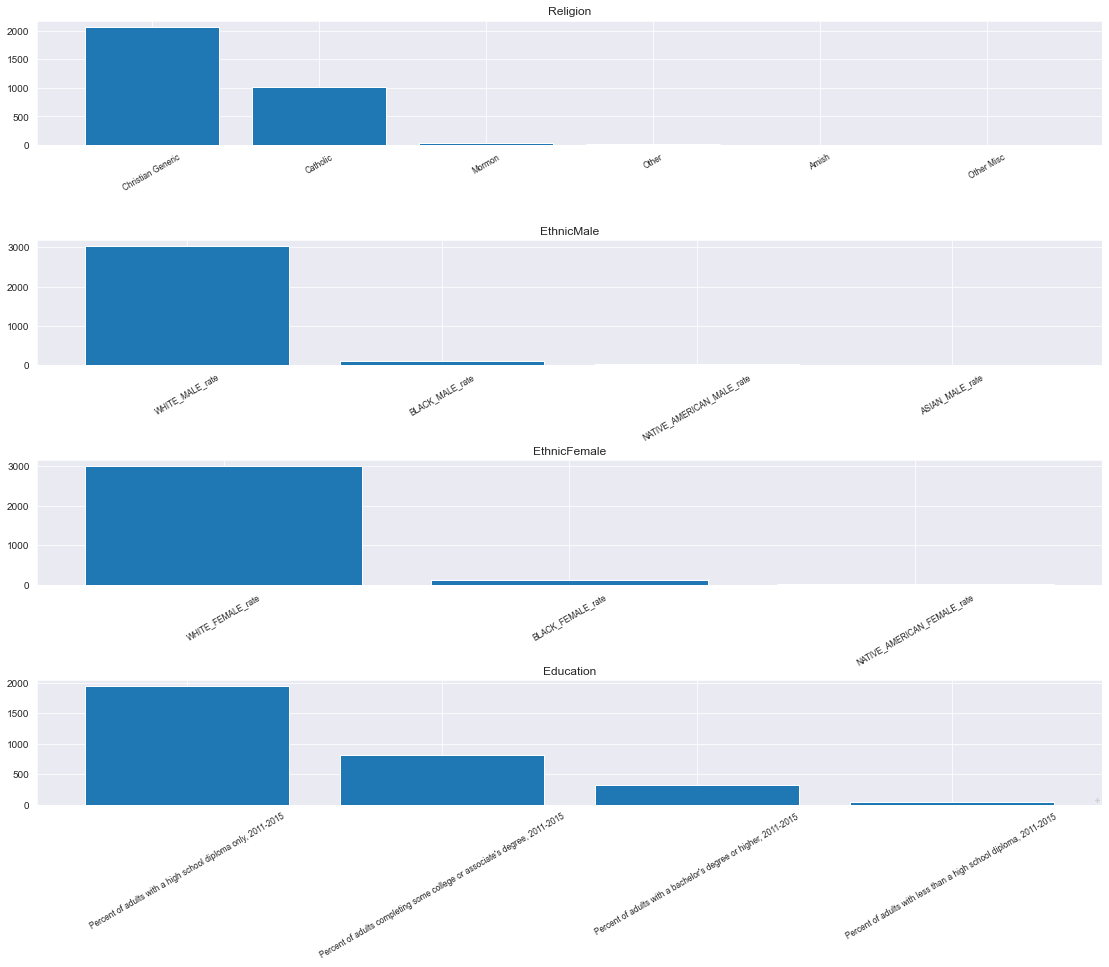

<Figure size 432x288 with 0 Axes>

In [51]:
##histogram of the following features: Religion, EthnicMale, EthnicFemale, Education
plt.figure(figsize=(16,12))
for i,col in enumerate(['Religion', 'EthnicMale', 'EthnicFemale', 'Education']):
    plt.subplot(4, 1, i + 1)
    df1 = pd.Series(df[col].value_counts())
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.title(col)
    plt.bar(range(len(df1)), df1.values, align='center')
    plt.xticks(range(len(df1)), df1.index.values, size='small',rotation=30)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure()

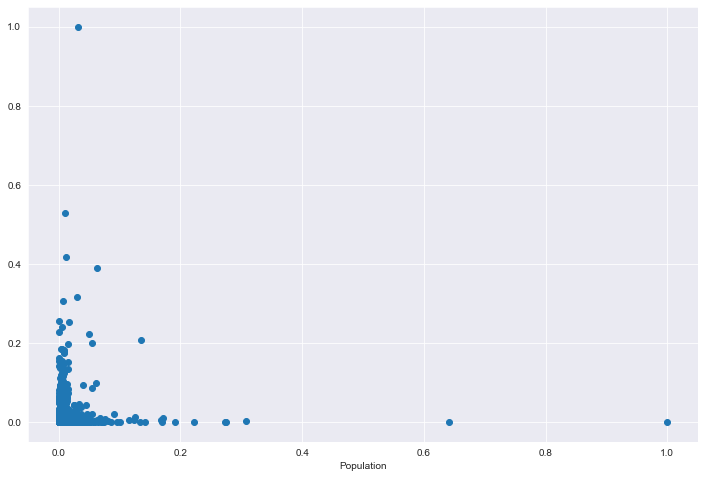

In [24]:
##2D scatter plot of Area and Population feature
plt.figure(figsize=(12,8))
plt.scatter(df["totalArea"], df["Population"])
plt.xlabel('Totalarea')
plt.xlabel('Population')

plt.show()

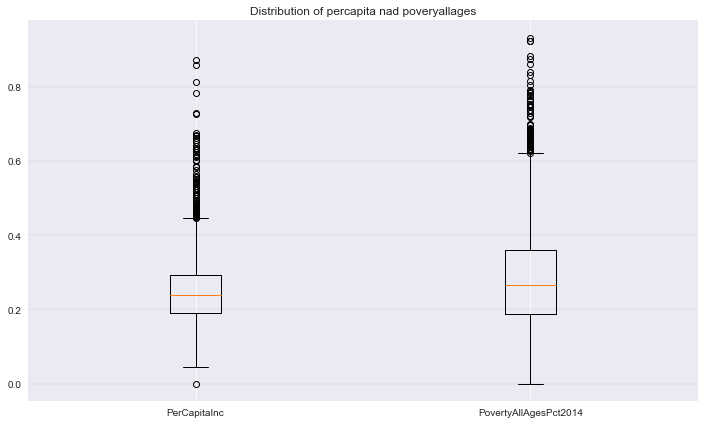

In [25]:

##Box plot of normalized PerCapitaInc and PovertyAllAgesPct2014 features
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of percapita nad poveryallages')
# Set species names as labels for the boxplot
dataset = [df["PerCapitaInc"], (df["PovertyAllAgesPct2014"]-df["PovertyAllAgesPct2014"].min())/df["PovertyAllAgesPct2014"].max()]

ax.boxplot(dataset, labels=['PerCapitaInc','PovertyAllAgesPct2014'])
plt.show()

## 1.8

In [74]:
##Are there any contradicting samples in the dataset? Are there any nonsensical samples? What do they look like? How many of them are there

# the data with population zero in 5 rows is an anomaly since fips population cant be zero.
df[df['Population']==0]

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,...,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat
14,2158,7471,22.500000,49.000000,23.500000,5.000000,23.200000,8119.000,0,3,...,0.001131,0.012374,0,0.757510,0.129665,0.011954,0.002299,0.012374,0.920187,0
22,2201,7471,13.423911,27.619536,29.160342,29.796285,5.366709,1161410.075,0,0,...,0.001131,0.012374,0,0.757510,0.129665,0.011954,0.002299,0.012374,0.006433,0
25,2232,7471,13.423911,27.619536,29.160342,29.796285,5.366709,1161410.075,0,0,...,0.001131,0.012374,0,0.757510,0.129665,0.011954,0.002299,0.012374,0.006433,0
30,2280,7471,13.423911,27.619536,29.160342,29.796285,5.366709,1161410.075,0,0,...,0.001131,0.012374,0,0.757510,0.129665,0.011954,0.002299,0.012374,0.006433,0
2415,46102,2896,22.200000,28.200000,38.300000,11.400000,11.600000,14373.000,0,3,...,0.000070,0.008279,0,0.065887,0.002226,0.912892,0.000209,0.008279,0.201489,1


In [27]:
df.describe()

,votes,unemploymentRate2015,POP ESTIMATE 2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,totalArea,PopDensity,voter_turnout_rate,Democrat,Young,Adult,Old
count,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000
mean,4.025041e+04,5.535792,0.010183,0.202862,0.249373,16.831301,7.058205,0.009998,0.008163,0.003774,0.450261,0.154531,0.248278,0.570367,0.121577
std,1.061758e+05,2.022568,0.032566,0.096287,0.089641,6.427022,3.349625,0.031859,0.025887,0.024833,0.325422,0.361514,0.036314,0.033058,0.032985
min,6.400000e+01,1.800000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.006433,0.000000,0.078408,0.373106,0.028765
25%,4.870000e+03,4.200000,0.001072,0.137366,0.189813,12.100000,4.725459,0.001127,0.003004,0.000245,0.384746,0.000000,0.226811,0.550369,0.099357
50%,1.073600e+04,5.300000,0.002522,0.187790,0.238689,15.800000,6.546822,0.002632,0.004395,0.000652,0.437939,0.000000,0.247601,0.570842,0.118563
75%,2.794100e+04,6.500000,0.006682,0.246261,0.292265,20.300000,8.560963,0.006777,0.006676,0.001650,0.491628,0.000000,0.266253,0.589605,0.139039
max,2.240323e+06,24.000000,0.999989,0.827612,0.871089,47.400000,27.810271,1.000000,0.999986,1.000000,12.187602,1.000000,0.448439,0.729594,0.370196


## 1.9

## What do you think the name of the label vector is?


The label vector is the democrat 

In [28]:
##result should be saved as elections clean.csv.
df.to_csv('elections clean.csv',index=False)

# 2

Implement ID3 decision-tree inference algorithm from scratch

## 2.1

In [29]:
#Import the dataset and define the feature as well as the target datasets / columns#
dataset = pd.read_csv('elections clean.csv')
dataset['Education']=dataset['Education'].str.replace(' ','_')
dataset['Religion']=dataset['Religion'].str.replace(' ','_')
dataset.head()



,fips,votes,unemploymentRate2015,POP ESTIMATE 2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,totalArea,...,Democrat,county,state,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale
0,2013,7471,3.2,0.000317,0.269065,0.297469,16.2,4.933009,0.000320,0.101538,...,0,13,2,Percent_of_adults_with_a_high_school_diploma_o...,Other_Misc,0.25037,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate
1,2016,7471,3.8,0.000550,0.371943,0.385160,9.9,4.287817,0.000566,0.095494,...,0,16,2,Percent_of_adults_with_a_high_school_diploma_o...,Catholic,0.25037,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate
2,2020,7471,5.0,0.029358,0.426171,0.445024,10.0,3.903225,0.029722,0.013254,...,0,20,2,Percent_of_adults_completing_some_college_or_a...,Christian_Generic,0.25037,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate
3,2050,7471,14.4,0.001754,0.192224,0.167820,23.8,8.644846,0.001733,0.307854,...,0,50,2,Percent_of_adults_with_a_high_school_diploma_o...,Catholic,0.25037,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate
4,2060,7471,9.2,0.000077,0.427476,0.452948,9.5,4.868154,0.000102,0.005991,...,0,60,2,Percent_of_adults_completing_some_college_or_a...,Catholic,0.25037,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate


In [30]:
##taking only categorical 
data=dataset.drop(columns=['Democrat'])
data['fips']=data['fips'].astype('str')
data['Democrat']=dataset['Democrat']
data

,fips,votes,unemploymentRate2015,POP ESTIMATE 2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,totalArea,...,county,state,Education,Religion,Young,Adult,Old,EthnicMale,EthnicFemale,Democrat
0,2013,7471,3.2,0.000317,0.269065,0.297469,16.2,4.933009,0.000320,0.101538,...,13,2,Percent_of_adults_with_a_high_school_diploma_o...,Other_Misc,0.250370,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate,0
1,2016,7471,3.8,0.000550,0.371943,0.385160,9.9,4.287817,0.000566,0.095494,...,16,2,Percent_of_adults_with_a_high_school_diploma_o...,Catholic,0.250370,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate,0
2,2020,7471,5.0,0.029358,0.426171,0.445024,10.0,3.903225,0.029722,0.013254,...,20,2,Percent_of_adults_completing_some_college_or_a...,Christian_Generic,0.250370,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate,0
3,2050,7471,14.4,0.001754,0.192224,0.167820,23.8,8.644846,0.001733,0.307854,...,50,2,Percent_of_adults_with_a_high_school_diploma_o...,Catholic,0.250370,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate,0
4,2060,7471,9.2,0.000077,0.427476,0.452948,9.5,4.868154,0.000102,0.005991,...,60,2,Percent_of_adults_completing_some_college_or_a...,Catholic,0.250370,0.584595,0.096915,WHITE_MALE_rate,WHITE_FEMALE_rate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56037,16661,4.6,0.004377,0.405508,0.350574,9.8,5.959690,0.004462,0.070966,...,37,56,Percent_of_adults_completing_some_college_or_a...,Catholic,0.300968,0.607045,0.060077,WHITE_MALE_rate,WHITE_FEMALE_rate,0
3141,56039,12176,3.8,0.002263,0.427349,0.556956,7.7,3.176056,0.002169,0.028513,...,39,56,Percent_of_adults_with_a_bachelor's_degree_or_...,Catholic,0.212065,0.668584,0.076151,WHITE_MALE_rate,WHITE_FEMALE_rate,1
3142,56041,8053,4.9,0.002036,0.279715,0.276340,10.0,6.860387,0.002151,0.014110,...,41,56,Percent_of_adults_with_a_high_school_diploma_o...,Mormon,0.320094,0.565364,0.071367,WHITE_MALE_rate,WHITE_FEMALE_rate,0
3143,56043,3715,4.0,0.000808,0.231974,0.294325,12.6,5.578363,0.000869,0.015160,...,43,56,Percent_of_adults_completing_some_college_or_a...,Christian_Generic,0.252882,0.538785,0.141811,WHITE_MALE_rate,WHITE_FEMALE_rate,0


In [31]:
for col in ['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']:
    encoder=LabelEncoder()
    data[col]=encoder.fit_transform(data[col])

In [59]:
##shuffle and split the data
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df



    
###Use 70% of the shuffled dataset for training and the rest for


training_data,testing_data = train_test_split(data, 0.3)

In [60]:
# 1.1 Data pure?
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False
    
# 1.2 Create Leaf
def create_leaf(data, ml_task):
    
    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)

    # classfication    
    else:
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        index = counts_unique_classes.argmax()
        leaf = unique_classes[index]

    return leaf


# 1.3 Determine potential splits
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits


# 1.4 Determine Best Split
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy




def calculate_overall_metric(data_below, data_above, metric_function):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below) 
                     + p_data_above * metric_function(data_above))
    
    return overall_metric


def determine_best_split(data, potential_splits, ml_task):
    
    first_iteration = True
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            
          
            current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_entropy)

            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False
                
                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value


# 1.5 Split data
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "categorical":
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
        
    
    # feature is continous   
    else:
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    return data_below, data_above


# 2. Decision Tree Algorithm
# 2.1 Helper Function
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "Democrat":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types


# 2.2 Algorithm
def decision_tree_algorithm(df, ml_task, counter=0, preprune= False, max_depth=3):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
        data[[]]
    else:
        data = df   
        
    if (check_purity(data)):
        leaf = create_leaf(data, ml_task)
        return leaf
    ##checking pruning
    if preprune and (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf

    
    # recursive part
    else:    
        counter += 1
        
        # helper functions 
        potential_splits = get_potential_splits(data)
        
        split_column, split_value = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, ml_task, counter,preprune, max_depth)
        no_answer = decision_tree_algorithm(data_above, ml_task, counter,preprune, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree


# 3. Make predictions
# 3.1 One example
def predict_example(example, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

    
# 3.2 All examples of a dataframe
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()
        
    return predictions


# 3.3 Accuracy
def calculate_accuracy(df, tree):
    predictions = make_predictions(df, tree)
    predictions_correct = predictions == df.Democrat
    accuracy = predictions_correct.mean()
    
    return accuracy

In [61]:
##creating tree, only the categirucal variables are taken in making the tree
tree = decision_tree_algorithm(training_data[['Education', 'Religion','EthnicMale','EthnicFemale', 'Democrat']], ml_task="classification")

In [62]:
##calculate accuarcy on testing dataset
accuracy=calculate_accuracy(testing_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree)
accuracy

0.9067796610169492



## 2.2

In [63]:
##pretty printing the tree
##the root node is Education
from pprint import pprint
pprint(tree)

{'Education = 1': [{'Religion = 1': [1, {'EthnicFemale = 2': [0, 1]}]},
                   {'EthnicFemale = 2': [{'Religion = 1': [{'Education = 3': [1,
                                                                              0]},
                                                           0]},
                                         {'EthnicFemale = 1': [{'Religion = 2': [0,
                                                                                 {'EthnicMale = 3': [0,
                                                                                                     1]}]},
                                                               1]}]}]}


In [55]:
##education is the root of the tree with more information gain


## 2.3 Making the plot 

In [52]:
test=testing_data.sample(200)
preds= make_predictions(test, tree)

In [53]:

n_classes = 2
plot_colors = "ryb"
test['fips']=test['fips'].astype(int)
xx, yy = np.meshgrid(test['fips'].astype(int).unique(),
                     test['Education'].unique())
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


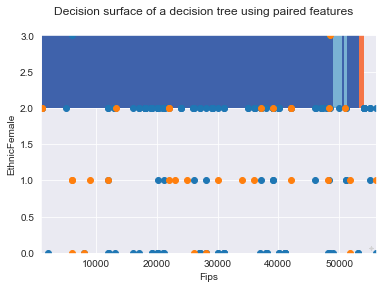

<Figure size 432x288 with 0 Axes>

In [54]:

Z = np.concatenate([[preds.values]] * yy.shape[0], axis=0)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('Fips')
plt.ylabel('EthnicFemale')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(test['Democrat'] == i)
    plt.scatter(test.iloc[idx]['fips'].values, test.iloc[idx]['Education'].values)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()

# 3

## Prepruning with depths

In [44]:
##the depth of the tree is reduced to specified max depth
tree3 = decision_tree_algorithm(training_data[['Education', 'Religion','EthnicMale','EthnicFemale', 'Democrat']], ml_task="classification", preprune= True, max_depth=3)
tree5 = decision_tree_algorithm(training_data[['Education', 'Religion','EthnicMale','EthnicFemale', 'Democrat']], ml_task="classification", preprune= True, max_depth=5)
tree7 = decision_tree_algorithm(training_data[['Education', 'Religion','EthnicMale','EthnicFemale', 'Democrat']], ml_task="classification", preprune= True, max_depth=7)

In [46]:
##finding training and testing errors of the tree of varying depths 3,5,7
##training data is 70% and testing data is 30%
testerror3=1-calculate_accuracy(testing_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree3)
testerror5=1-calculate_accuracy(testing_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree5)
testerror7=1-calculate_accuracy(testing_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree7)

trainerror3=1-calculate_accuracy(training_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree3)
trainerror5=1-calculate_accuracy(training_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree5)
trainerror7=1-calculate_accuracy(training_data[['Education', 'Religion','EthnicMale',
       'EthnicFemale', 'Democrat']], tree7)

In [47]:
depths=[3, 5, 7]
trainerrors=[trainerror3,trainerror5,trainerror7]
testerrors=[testerror3,testerror5,testerror7]

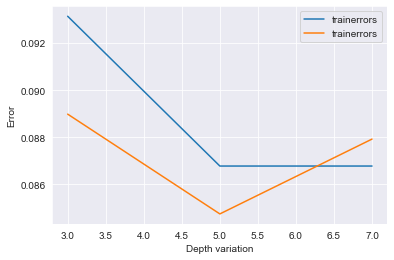

In [48]:
plt.plot(depths, trainerrors, label = "trainerrors")
plt.plot(depths, testerrors, label = "trainerrors")
plt.legend()
plt.xlabel('Depth variation')
plt.ylabel('Error')

plt.show()

We can see that training and testing error decreases as the depth of the tree increases in prepruning .THe best depth is at 5 due to less traning and test error.